### smet文件转换为csv文件

In [2]:
import os
import pandas as pd

input_folder = '/home/develop/GATv2-VAE_NewData/data/origin'
output_folder = '/home/develop/GATv2-VAE_NewData/data/csvwithHeader/'

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

smet_files = [f for f in os.listdir(input_folder) if f.endswith('.smet')]

for smet_file in smet_files:
    smet_file_path = os.path.join(input_folder, smet_file)

    try:
        data = pd.read_csv(smet_file_path, sep='\t', header=None)
        output_csv_path = os.path.join(output_folder, smet_file.replace('.smet', '.csv'))
        data.to_csv(output_csv_path, index=False)
    except Exception as e:
        print("转换完成")

### 去除头部Header

In [3]:
import os

# 输入和输出目录
input_dir = '/home/develop/GATv2-VAE_NewData/data/csvwithHeader/'
output_dir = '/home/develop/GATv2-VAE_NewData/data/csv/'

# 确保输出目录存在
os.makedirs(output_dir, exist_ok=True)

# 遍历输入目录中的所有.csv文件
for filename in os.listdir(input_dir):
    if filename.endswith('.csv'):
        input_filepath = os.path.join(input_dir, filename)
        
        # 打开当前CSV文件并读取内容
        with open(input_filepath, 'r') as file:
            lines = file.readlines()

        # 查找 [DATA] 行的位置
        start_index = None
        for i, line in enumerate(lines):
            if '[DATA]' in line:
                start_index = i + 1  # 从[DATA]之后开始提取
                break

        # 如果找到了[DATA]部分
        if start_index is not None:
            # 提取从[DATA]行之后的数据
            data_to_keep = lines[start_index:]
            
            # 定义输出文件的路径
            output_filepath = os.path.join(output_dir, filename)
            
            # 将提取的数据写入新的文件
            with open(output_filepath, 'w') as output_file:
                output_file.writelines(data_to_keep)
            
            print(f"处理并保存文件: {filename}")
        else:
            print(f"文件 {filename} 中没有找到 [DATA] 标签")


处理并保存文件: ceshi_temp.csv
处理并保存文件: ceshi.csv
处理并保存文件: ceshi_Prec.csv
处理并保存文件: ceshi_wind.csv


### 删除时间戳

In [4]:
import os
import pandas as pd


input_folder = "/home/develop/GATv2-VAE_NewData/data/csv/"
csv_files = [f for f in os.listdir(input_folder) if f.endswith(".csv")]

for file in csv_files:
    file_path = os.path.join(input_folder, file)

    try:
        # 读取文件，指定分隔符为空格
        df = pd.read_csv(file_path, delim_whitespace=True, header=None)
        df = df.iloc[:, 1:]  # 删除第一列
            # 覆盖保存原文件
        df.to_csv(file_path, index=False, header=False, sep=" ")
        print(f"已处理并覆盖文件: {file_path}")
        
    except Exception as e:
        print(f"处理文件 {file_path} 时出错: {e}")


/tmp/ipykernel_3465788/1346530361.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)
/tmp/ipykernel_3465788/1346530361.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)


已处理并覆盖文件: /home/develop/GATv2-VAE_NewData/data/csv/ceshi_temp.csv
已处理并覆盖文件: /home/develop/GATv2-VAE_NewData/data/csv/ceshi.csv


/tmp/ipykernel_3465788/1346530361.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)
/tmp/ipykernel_3465788/1346530361.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)


已处理并覆盖文件: /home/develop/GATv2-VAE_NewData/data/csv/ceshi_Prec.csv
已处理并覆盖文件: /home/develop/GATv2-VAE_NewData/data/csv/ceshi_wind.csv


### 不同列之间用逗号隔开同时将内容转换为数值类型

In [5]:
import os
import pandas as pd

# 指定CSV文件夹路径
folder_path = '/home/develop/GATv2-VAE_NewData/data/csv/'

# 遍历文件夹中的所有CSV文件
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        
        # 读取文件，将空格作为分隔符，尝试将所有数据解析为数值类型
        data = pd.read_csv(file_path, delim_whitespace=True, header=None)
        
        # 将所有数据转换为数值类型，无法转换的内容置为NaN
        data = data.apply(pd.to_numeric, errors='coerce')
        
        # 将DataFrame保存为新的CSV文件，使用空格作为分隔符
        data.to_csv(file_path, index=False, header=False, sep=',')
        
        print(f"文件 {filename} 已成功转换为数值类型，并使用逗号分隔保存。")

/tmp/ipykernel_3465788/3391438166.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)
/tmp/ipykernel_3465788/3391438166.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)


文件 ceshi_temp.csv 已成功转换为数值类型，并使用逗号分隔保存。
文件 ceshi.csv 已成功转换为数值类型，并使用逗号分隔保存。


/tmp/ipykernel_3465788/3391438166.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)
/tmp/ipykernel_3465788/3391438166.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)


文件 ceshi_Prec.csv 已成功转换为数值类型，并使用逗号分隔保存。
文件 ceshi_wind.csv 已成功转换为数值类型，并使用逗号分隔保存。


### 添加列名

In [ ]:
import os
import pandas as pd

# 定义文件夹路径
folder_path = '/home/develop/GATv2-VAE_NewData/data/csv/'

# 定义表头（列名）
header = [
    "sensible_heat", "latent_heat", "ground_heat", "ground_temperature", 
    "ground_heat_at_soil_interface", "rain_energy", "outgoing_long_wave_radiation", 
    "incoming_long_wave_radiation", "net_long_wave_radiation", "reflected_short_wave_radiation", 
    "incoming_short_wave_radiation", "net_short_wave_radiation", "parametrized_albedo", 
    "measured_albedo", "incoming_short_wave_on_horizontal", "direct_incoming_short_wave", 
    "diffuse_incoming_short_wave", "air_temperature", "surface_temperature(mod)", 
    "surface_temperature(meas)", "bottom_temperature", "relative_humidity", "wind_velocity", 
    "wind_velocity_drift", "wind_direction", "solid_precipitation_rate", "snow_height(mod)", 
    "snow_height(meas)", "hoar_size", "24h_wind_drift", "24h_height_of_new_snow", 
    "3d_sum_of_daily_height_of_new_snow", "snow_water_equivalent", "total_amount_of_water", 
    "erosion_mass_loss", "rain_rate", "virtual_lysimeter", 
    "virtual_lysimeter_under_the_soil", "sublimation_mass", "evaporated_mass", 
    "temperature@0.25m", "temperature@0.5m", "temperature@1m", "temperature@-0.25m", 
    "temperature@-0.1m", "profile_type", "stability_class", "z_Sdef", 
    "deformation_rate_stability_index", "z_Sn38", "natural_stability_index", "z_Sk38", 
    "Sk38_skier_stability_index", "z_SSI", "structural_stability_index", "z_S5", 
    "stability_index_5"
]


# 遍历文件夹中的所有 CSV 文件
for file_name in os.listdir(folder_path):    
    # 拼接完整路径
    file_path = os.path.join(folder_path, file_name)
    
    # 检查文件是否是 CSV 文件
    if not file_path.endswith('.csv'):
        continue
    
    try:
        # 读取 CSV 文件，以逗号为分隔符
        data = pd.read_csv(file_path, header=None, sep=',')
        
        # 检查列数是否与表头匹配
        if len(data.columns) == len(header):
            print(f"列数匹配，表头将被添加到文件中: {file_name}")
            # 添加表头
            data.columns = header

            # 将修改后的数据保存回 CSV 文件
            data.to_csv(file_path, index=False, sep=',')
            print(f"表头已成功添加到 {file_name}。")
        else:
            print(f"列数不匹配！文件: {file_name}，实际列数为 {len(data.columns)}，表头参数个数为 {len(header)}。")
    except Exception as e:
        print(f"处理文件 {file_name} 时出错: {e}")


列数匹配，表头将被添加到文件中: ceshi_temp.csv
表头已成功添加到 ceshi_temp.csv。
列数匹配，表头将被添加到文件中: ceshi.csv
表头已成功添加到 ceshi.csv。
列数匹配，表头将被添加到文件中: ceshi_Prec.csv
表头已成功添加到 ceshi_Prec.csv。
列数匹配，表头将被添加到文件中: ceshi_wind.csv
表头已成功添加到 ceshi_wind.csv。


### 遍历文件，找到值不变的列

In [27]:
import pandas as pd
import os

# 定义文件路径
file_path = '/home/develop/GATv2-VAE_NewData/data/csv/ceshi_wind.csv'

# 读取 CSV 文件
data = pd.read_csv(file_path, header=0, sep=',', low_memory=False)

# 遍历每一列
for col in data.columns:
    # 检查列中是否所有值都相同
    unique_values = data[col].unique()
    if len(unique_values) == 1:
        # 输出列名和该列唯一的数值
        print(f"列 '{col}' 的所有值相同，值为: {unique_values[0]}")


列 'ground_heat' 的所有值相同，值为: -999
列 'measured_albedo' 的所有值相同，值为: -999
列 'surface_temperature(meas)' 的所有值相同，值为: -999
列 '24h_wind_drift' 的所有值相同，值为: 0.0
列 'virtual_lysimeter_under_the_soil' 的所有值相同，值为: -999
列 'temperature@0.25m' 的所有值相同，值为: -999
列 'temperature@0.5m' 的所有值相同，值为: -999
列 'temperature@1m' 的所有值相同，值为: -999
列 'temperature@-0.25m' 的所有值相同，值为: -999
列 'temperature@-0.1m' 的所有值相同，值为: -999
列 'profile_type' 的所有值相同，值为: -1.0
列 'z_S5' 的所有值相同，值为: 0.0


In [28]:
import pandas as pd

# 定义文件路径
file_path = '/home/develop/GATv2-VAE_NewData/data/csv/ceshi_wind.csv'

# 读取 CSV 文件
data = pd.read_csv(file_path, header=0, sep=',', low_memory=False)

# 定义要删除的列名列表
columns_to_drop = [
    "ground_heat", "measured_albedo", "surface_temperature(meas)", 
    "24h_wind_drift", "erosion_mass_loss", "virtual_lysimeter_under_the_soil", 
    "temperature@0.25m", "temperature@0.5m", "temperature@1m", 
    "temperature@-0.25m", "temperature@-0.1m", "profile_type", "z_S5"
]

# 删除指定列
data.drop(columns=columns_to_drop, inplace=True)

# 保存修改后的数据回到 CSV 文件
data.to_csv(file_path, index=False)

print("已删除指定的列:", columns_to_drop)


已删除指定的列: ['ground_heat', 'measured_albedo', 'surface_temperature(meas)', '24h_wind_drift', 'erosion_mass_loss', 'virtual_lysimeter_under_the_soil', 'temperature@0.25m', 'temperature@0.5m', 'temperature@1m', 'temperature@-0.25m', 'temperature@-0.1m', 'profile_type', 'z_S5']


### 多少行包含缺失值

In [1]:
import pandas as pd
file_path = '/home/develop/GATv2-VAE_NewData/data/csv/ceshi_wind.csv'
data = pd.read_csv(file_path, header=0, sep=',', na_values=-999, low_memory=False)
rows_with_missing_values = data.isnull().any(axis=1).sum()
print(f"包含缺失值的行数: {rows_with_missing_values}")

包含缺失值的行数: 0


### 哪些列包含缺失值

In [2]:
import pandas as pd
import numpy as np

# 定义文件路径
file_path = '/home/develop/GATv2-VAE_NewData/data/csv/ceshi_wind.csv'

data = pd.read_csv(file_path, header=0, sep=',', na_values=-999, low_memory=False)

columns_with_missing_values = data.columns[data.isnull().any()]

print(f"包含缺失值的列数: {len(columns_with_missing_values)}")
print("包含缺失值的列名:")
for col in columns_with_missing_values:
    print(col)

包含缺失值的列数: 0
包含缺失值的列名:


### 删除包含缺失值的列

In [31]:
import pandas as pd

# 定义文件路径
file_path = '/home/develop/GATv2-VAE_NewData/data/csv/ceshi_wind.csv'

# 读取 CSV 文件
data = pd.read_csv(file_path, header=0, sep=',', low_memory=False)

# 定义要删除的列名列表
columns_to_drop = [
    "ground_heat_at_soil_interface",  "stability_index_5"
]

# 删除指定列
data.drop(columns=columns_to_drop, inplace=True)

# 保存修改后的数据回到 CSV 文件
data.to_csv(file_path, index=False)

print("已删除指定的列:", columns_to_drop)


已删除指定的列: ['ground_heat_at_soil_interface', 'stability_index_5']


### 输出文件形状

In [32]:
import pandas as pd
import numpy as np

file_path = '/home/develop/GATv2-VAE_NewData/data/csv/ceshi_wind.csv'
data = pd.read_csv(file_path, header=0, sep=',',low_memory=False)
x,y = data.shape
print(f'行数:{x},列数:{y}')

行数:3601,列数:42


### 对数据进行归一化

In [18]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 读取原始数据
file_path = '/home/develop/GATv2-VAE_NewData/data/csv/ceshi_temp.csv'
data = pd.read_csv(file_path)

# 初始化 MinMaxScaler
scaler = MinMaxScaler()

# 对数据进行归一化，忽略非数值列（如果有的话）
# 如果所有列都是数值类型，则可以直接应用于整个 DataFrame
data_normalized = data.copy()  # 创建一个副本，避免修改原始数据

# 对所有列进行归一化，假设数据中没有非数值列
data_normalized.iloc[:, :] = scaler.fit_transform(data_normalized)

# 保存归一化后的数据
output_path = '/home/develop/GATv2-VAE_NewData/data/csv/ceshi_temp_normalized.csv'
data_normalized.to_csv(output_path, index=False)

print(f"归一化后的数据已保存到 {output_path}")


归一化后的数据已保存到 /home/develop/GATv2-VAE_NewData/data/csv/ceshi_temp_normalized.csv


In [19]:
file_path = '/home/develop/GATv2-VAE_NewData/data/csv/ceshi_temp_normalized.csv'
data = pd.read_csv(file_path, header=0, sep=',',low_memory=False)
x,y = data.shape
print(f'行数:{x},列数:{y}')

行数:3601,列数:42


异常数据：(53, 128, 190, 343, 526, 612, 1321, 1652, 1823, 1932, 2024, 2135, 2352, 2683, 2794)

### 将可能得异常点添加到`test.csv`中，并保留原有的index

In [20]:
import pandas as pd

# 读取原始数据
file_path = '/home/develop/GATv2-VAE_NewData/data/csv/ceshi_temp_normalized.csv'
df = pd.read_csv(file_path)

# 定义需要获取的行的索引
indices = [53, 128, 190, 343, 526, 612, 1321, 1652, 1823, 1932, 2024, 2135, 2352, 2683, 2794]

# 获取指定行及其前后两行
rows_to_extract = []
for index in indices:
    # 保证索引不越界，取前两行和后两行
    start = max(0, index - 2)
    end = min(len(df), index + 3)
    rows_to_extract.append(df.iloc[start:end])

# 合并所有要提取的行
extracted_data = pd.concat(rows_to_extract)

# 添加“yichang”列，值为1
extracted_data['yichang'] = 1

# 保存提取的行到新文件test.csv
test_file_path = '/home/develop/GATv2-VAE_NewData/data/csv/test_temp.csv'
extracted_data.to_csv(test_file_path, index=False)

# 删除原数据中的这些行及其前后两行
rows_to_delete = set()
for index in indices:
    # 删除前两行和后两行
    start = max(0, index - 2)
    end = min(len(df), index + 3)
    rows_to_delete.update(range(start, end))

# 从原数据中删除这些行
df_cleaned = df.drop(rows_to_delete)

df_cleaned.to_csv(file_path, index=False)

print(f"提取的数据已保存到: {test_file_path}")
print(f"清理后的数据已保存到: {cleaned_file_path}")


提取的数据已保存到: /home/develop/GATv2-VAE_NewData/data/csv/test_temp.csv
清理后的数据已保存到: /home/develop/GATv2-VAE_NewData/data/csv/ceshi_temp_normalized.csv


In [21]:
file_path = '/home/develop/GATv2-VAE_NewData/data/csv/ceshi_temp_normalized.csv'
data = pd.read_csv(file_path, header=0, sep=',',low_memory=False)
x,y = data.shape
print(f'行数:{x},列数:{y}')

行数:3526,列数:42


In [22]:
file_path = '/home/develop/GATv2-VAE_NewData/data/csv/test_temp.csv'
data = pd.read_csv(file_path, header=0, sep=',',low_memory=False)
x,y = data.shape
print(f'行数:{x},列数:{y}')

行数:75,列数:43


### 使用训练集训练训练GATv2模型

In [23]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GATv2Conv
from torch_geometric.utils import dense_to_sparse
from sklearn.model_selection import ParameterGrid

# 读取数据
file_path = '/home/develop/GATv2-VAE_NewData/data/csv/ceshi_temp_normalized.csv'
data = pd.read_csv(file_path)
features = torch.tensor(data.values, dtype=torch.float32)  

# 转置特征矩阵，适配 GAT 输入 (节点数, 特征维度)
features = features.T  # 

# 创建边索引（完全图假设，每个特征和其他特征都有边）
num_features = features.size(0)
adj_matrix = torch.ones((num_features, num_features)) - torch.eye(num_features)  # 完全图
edge_index = dense_to_sparse(adj_matrix)[0]

# 构造图数据
graph_data = Data(x=features, edge_index=edge_index)

# GATv2 模型定义
class GATv2Net(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads):
        super(GATv2Net, self).__init__()
        self.conv1 = GATv2Conv(in_channels, hidden_channels, heads=heads, concat=True)
        self.conv2 = GATv2Conv(hidden_channels * heads, out_channels, heads=1, concat=False)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = self.conv2(x, edge_index)
        return x

# 网格搜索的超参数组合
param_grid = {
    'hidden_channels': [8, 16, 32],
    'heads': [1, 2, 4],
    'learning_rate': [0.001, 0.005],
    'weight_decay': [0.0, 1e-4]
}
grid = ParameterGrid(param_grid)

# 早停策略
class EarlyStopping:
    def __init__(self, patience=10):
        self.patience = patience
        self.best_loss = float('inf')
        self.counter = 0
        self.early_stop = False

    def step(self, loss):
        if loss < self.best_loss:
            self.best_loss = loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

# 日志保存路径
log_dir = "/home/develop/GATv2-VAE_NewData/Result"
os.makedirs(log_dir, exist_ok=True)
log_file = os.path.join(log_dir, "GATv2_Train.log")

# 训练过程
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
results = []

with open(log_file, "w") as log:
    for params in grid:
        # 打印当前超参数组合
        log.write(f"Training with params: {params}\n")
        print(f"Training with params: {params}")
        
        # 模型实例化
        model = GATv2Net(
            in_channels=features.size(1),
            hidden_channels=params['hidden_channels'],
            out_channels=features.size(1),
            heads=params['heads']
        ).to(device)

        optimizer = torch.optim.Adam(
            model.parameters(),
            lr=params['learning_rate'],
            weight_decay=params['weight_decay']
        )
        loss_fn = nn.MSELoss()

        graph_data = graph_data.to(device)
        model.train()
        early_stopping = EarlyStopping(patience=10)

        for epoch in range(100):  # 最大训练轮数
            optimizer.zero_grad()
            out = model(graph_data.x, graph_data.edge_index)  # 前向传播
            loss = loss_fn(out, graph_data.x)  # 重构损失
            loss.backward()  # 反向传播
            optimizer.step()  # 参数更新

            early_stopping.step(loss.item())
            if early_stopping.early_stop:
                break

        # 记录结果
        final_loss = early_stopping.best_loss
        results.append({
            'params': params,
            'final_loss': final_loss
        })

        log.write(f"Final Loss for params {params}: {final_loss:.6f}\n")
        log.write("-" * 50 + "\n")
        print(f"Final Loss for params {params}: {final_loss:.6f}")

# 打印最佳超参数组合
best_result = min(results, key=lambda x: x['final_loss'])
with open(log_file, "a") as log:
    log.write("\nBest Hyperparameters:\n")
    log.write(str(best_result['params']) + "\n")
    log.write(f"Best Loss: {best_result['final_loss']:.6f}\n")

print("\nBest Hyperparameters:", best_result['params'])
print("Best Loss:", best_result['final_loss'])


Training with params: {'heads': 1, 'hidden_channels': 8, 'learning_rate': 0.001, 'weight_decay': 0.0}
Final Loss for params {'heads': 1, 'hidden_channels': 8, 'learning_rate': 0.001, 'weight_decay': 0.0}: 0.059586
Training with params: {'heads': 1, 'hidden_channels': 8, 'learning_rate': 0.001, 'weight_decay': 0.0001}
Final Loss for params {'heads': 1, 'hidden_channels': 8, 'learning_rate': 0.001, 'weight_decay': 0.0001}: 0.052277
Training with params: {'heads': 1, 'hidden_channels': 8, 'learning_rate': 0.005, 'weight_decay': 0.0}
Final Loss for params {'heads': 1, 'hidden_channels': 8, 'learning_rate': 0.005, 'weight_decay': 0.0}: 0.114787
Training with params: {'heads': 1, 'hidden_channels': 8, 'learning_rate': 0.005, 'weight_decay': 0.0001}
Final Loss for params {'heads': 1, 'hidden_channels': 8, 'learning_rate': 0.005, 'weight_decay': 0.0001}: 0.114818
Training with params: {'heads': 1, 'hidden_channels': 16, 'learning_rate': 0.001, 'weight_decay': 0.0}
Final Loss for params {'heads

### Best Hyperparameters:

{'heads': 4, 'hidden_channels': 8, 'learning_rate': 0.001, 'weight_decay': 0.0}

**Best Loss: 0.047062**

### 根据确定超参数训练并保存模型

In [ ]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GATv2Conv
from torch_geometric.utils import dense_to_sparse
import pandas as pd


# 超参数
hidden_channels = 8  # 隐藏层维度
heads = 4  # 多头注意力
learning_rate = 0.001  # 学习率
weight_decay = 0.0  # 权重衰减
epochs = 100  # 最大训练轮数
patience = 10  # 早停容忍次数
save_path = "/home/develop/GATv2-VAE_NewData/Model/GATv2_trained.pth"  # 保存路径
log_file = "/home/develop/GATv2-VAE_NewData/Result/GATv2_Train.log"  # 日志路径

# 数据加载与预处理
file_path = '/home/develop/GATv2-VAE_NewData/data/csv/ceshi_temp_normalized.csv'
data = pd.read_csv(file_path)
features = torch.tensor(data.values, dtype=torch.float32) 

# 转置特征矩阵，适配 GAT 输入 (节点数, 特征维度)
features = features.T

# 创建边索引（完全图假设，每个特征和其他特征都有边）
num_features = features.size(0)
adj_matrix = torch.ones((num_features, num_features)) - torch.eye(num_features)  # 完全图
edge_index = dense_to_sparse(adj_matrix)[0]

# 构造图数据
graph_data = Data(x=features, edge_index=edge_index)

# GATv2 模型定义
class GATv2Net(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads):
        super(GATv2Net, self).__init__()
        self.conv1 = GATv2Conv(in_channels, hidden_channels, heads=heads, concat=True)
        self.conv2 = GATv2Conv(hidden_channels * heads, out_channels, heads=1, concat=False)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = self.conv2(x, edge_index)
        return x

# 早停机制
class EarlyStopping:
    def __init__(self, patience=10):
        self.patience = patience
        self.best_loss = float('inf')
        self.counter = 0
        self.early_stop = False

    def step(self, loss):
        if loss < self.best_loss:
            self.best_loss = loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

# 确保日志目录存在
os.makedirs(os.path.dirname(log_file), exist_ok=True)

# 初始化模型和优化器
device = torch.device('cpu')  # 强制使用 CPU
model = GATv2Net(
    in_channels=features.size(1),
    hidden_channels=hidden_channels,
    out_channels=features.size(1),  # 输出维度等于输入维度（重构任务）
    heads=heads
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
loss_fn = nn.MSELoss()

# 确保 graph_data 的所有元素移动到设备
graph_data = graph_data.to(device)

# 模型训练
model.train()
early_stopping = EarlyStopping(patience=patience)

with open(log_file, "w") as log:
    for epoch in range(epochs):
        optimizer.zero_grad()
        out = model(graph_data.x, graph_data.edge_index)  # 前向传播
        loss = loss_fn(out, graph_data.x)  # 重构损失
        loss.backward()  # 反向传播
        optimizer.step()  # 参数更新

        # 记录日志
        log.write(f"Epoch {epoch}/{epochs}, Loss: {loss.item():.6f}\n")
        print(f"Epoch {epoch}/{epochs}, Loss: {loss.item():.6f}")

        # 检查早停
        early_stopping.step(loss.item())
        if early_stopping.early_stop:
            print(f"Early stopping triggered at epoch {epoch}")
            log.write(f"Early stopping triggered at epoch {epoch}\n")
            break

# 保存训练好的模型
torch.save(model, save_path)
print(f"Model saved to {save_path}")
with open(log_file, "a") as log:
    log.write(f"Model saved to {save_path}\n")


### 使用GATv2进行推理

In [1]:
import torch
import pandas as pd
from torch_geometric.data import Data
from torch_geometric.utils import dense_to_sparse
import torch.nn as nn
import os
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GATv2Conv
from torch_geometric.utils import dense_to_sparse
from sklearn.model_selection import ParameterGrid



# GATv2 模型定义
class GATv2Net(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads):
        super(GATv2Net, self).__init__()
        self.conv1 = GATv2Conv(in_channels, hidden_channels, heads=heads, concat=True)
        self.conv2 = GATv2Conv(hidden_channels * heads, out_channels, heads=1, concat=False)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = self.conv2(x, edge_index)
        return x
# 1. 加载新数据（ceshi.csv）
file_path = '/home/develop/GATv2-VAE_NewData/data/csv/ceshi_temp_normalized.csv'
data_new = pd.read_csv(file_path)

# 2. 转换数据为 PyTorch 张量，并转置（确保维度为 (特征数, 样本数)）
features_new = torch.tensor(data_new.values, dtype=torch.float32).T  # 转置，维度 (42, N)
num_features_new = features_new.size(0)  # 42

# 3. 创建边索引（完全图假设，每个特征和其他特征都有边）
adj_matrix_new = torch.ones((num_features_new, num_features_new)) - torch.eye(num_features_new)  # 完全图
edge_index_new = dense_to_sparse(adj_matrix_new)[0]

# 4. 创建图数据对象
device = torch.device('cpu')  # 使用 CPU
graph_data_new = Data(x=features_new, edge_index=edge_index_new)

# 5. 加载训练好的 GATv2 模型
model = torch.load("/home/develop/GATv2-VAE_NewData/Model/GATv2_trained.pth")
model.eval()  # 设置为评估模式

# 6. 确保数据移到正确的设备
graph_data_new = graph_data_new.to(device)

# 7. 推理
with torch.no_grad():  # 禁用梯度计算
    output_new = model(graph_data_new.x, graph_data_new.edge_index)  # 获得模型输出

# 8. 打印输出
print("GATv2 模型的输出：")
print(output_new)  # 打印推理结果

# 9. 输出数据的维度，确认是否匹配预期
print(f"模型输出的维度: {output_new.shape}")


/tmp/ipykernel_3965708/2772140549.py:47: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load("/home/develop/GATv2-VAE_NewData/Model/GATv2_trained.pth")


GATv2 模型的输出：
tensor([[0.2176, 0.2193, 0.2502,  ..., 0.2610, 0.2580, 0.2819],
        [0.2176, 0.2193, 0.2502,  ..., 0.2610, 0.2580, 0.2819],
        [0.2176, 0.2193, 0.2502,  ..., 0.2610, 0.2580, 0.2819],
        ...,
        [0.2176, 0.2193, 0.2502,  ..., 0.2610, 0.2580, 0.2819],
        [0.2176, 0.2193, 0.2502,  ..., 0.2610, 0.2580, 0.2819],
        [0.2176, 0.2193, 0.2502,  ..., 0.2610, 0.2580, 0.2819]])
模型输出的维度: torch.Size([42, 3526])


In [4]:
output_new_transposed = output_new.T  # 转置后变为 [1186, 42]
output_new_transposed_np = output_new_transposed.detach().numpy()  # 转换为 NumPy 数组

print(output_new_transposed.shape)
print(type(output_new_transposed))
output_new_transposed_df = pd.DataFrame(output_new_transposed.numpy())

print(output_new_transposed_df.shape)
print(type(output_new_transposed_df))
print(output_new_transposed_df)

torch.Size([3526, 42])
<class 'torch.Tensor'>
(3526, 42)
<class 'pandas.core.frame.DataFrame'>
            0         1         2         3         4         5         6   \
0     0.217603  0.217603  0.217603  0.217603  0.217604  0.217604  0.217603   
1     0.219291  0.219291  0.219291  0.219291  0.219291  0.219291  0.219291   
2     0.250203  0.250203  0.250203  0.250203  0.250203  0.250203  0.250203   
3     0.293796  0.293796  0.293796  0.293796  0.293796  0.293796  0.293796   
4     0.306096  0.306096  0.306096  0.306096  0.306096  0.306096  0.306096   
...        ...       ...       ...       ...       ...       ...       ...   
3521  0.257196  0.257196  0.257196  0.257196  0.257196  0.257196  0.257196   
3522  0.279865  0.279865  0.279865  0.279865  0.279865  0.279865  0.279865   
3523  0.260976  0.260976  0.260976  0.260976  0.260976  0.260976  0.260976   
3524  0.258028  0.258028  0.258028  0.258028  0.258028  0.258028  0.258028   
3525  0.281887  0.281887  0.281887  0.281887  0

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, Model
from datetime import datetime

# 假设output_new_transposed_df是GATv2模型的输出DataFrame
# output_new_transposed_df = your_data_here

# 1. 数据预处理
X = output_new_transposed_df.values  # 转为numpy数组

# 划分训练集和验证集，按8:2划分
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# 定义采样层
def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.random.normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# 定义编码器部分为独立的模型
class Encoder(layers.Layer):
    def __init__(self, latent_dim, **kwargs):
        super(Encoder, self).__init__(**kwargs)
        self.dense_1 = layers.Dense(64, activation="relu")
        self.dense_2 = layers.Dense(32, activation="relu")
        self.dense_mean = layers.Dense(latent_dim)
        self.dense_log_var = layers.Dense(latent_dim)
        self.sampling_layer = layers.Lambda(sampling)

    def call(self, inputs):
        x = self.dense_1(inputs)
        x = self.dense_2(x)
        z_mean = self.dense_mean(x)
        z_log_var = self.dense_log_var(x)
        z = self.sampling_layer([z_mean, z_log_var])
        return z_mean, z_log_var, z

# 定义解码器部分为独立的模型
class Decoder(layers.Layer):
    def __init__(self, original_dim, **kwargs):
        super(Decoder, self).__init__(**kwargs)
        self.dense_1 = layers.Dense(32, activation="relu")
        self.dense_2 = layers.Dense(64, activation="relu")
        self.dense_output = layers.Dense(original_dim, activation="sigmoid")

    def call(self, inputs):
        x = self.dense_1(inputs)
        x = self.dense_2(x)
        return self.dense_output(x)

# 定义VAE模型
class VAE(Model):
    def __init__(self, original_dim, latent_dim, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.original_dim = original_dim
        self.encoder = Encoder(latent_dim=latent_dim)
        self.decoder = Decoder(original_dim=original_dim)
        self.total_loss_tracker = tf.keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = tf.keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = tf.keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss_fn = tf.keras.losses.MeanSquaredError()
            reconstruction_loss = tf.reduce_mean(reconstruction_loss_fn(data, reconstruction))
            kl_loss = -0.5 * tf.reduce_mean(
                1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=-1
            )
            total_loss = reconstruction_loss + 0.1 * kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

    def test_step(self, data):
        z_mean, z_log_var, z = self.encoder(data)
        reconstruction = self.decoder(z)
        reconstruction_loss_fn = tf.keras.losses.MeanSquaredError()
        reconstruction_loss = tf.reduce_mean(reconstruction_loss_fn(data, reconstruction))
        kl_loss = -0.5 * tf.reduce_mean(
            1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=-1
        )
        total_loss = reconstruction_loss + 0.1 * kl_loss
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

    def call(self, inputs):
        _, _, z = self.encoder(inputs)
        return self.decoder(z)

# 设置超参数网格
latent_dims = [5, 10, 15, 20]  # 潜在空间维度
batch_sizes = [16, 32, 64]
epochs_list = [20, 30, 50]
log_file = "/home/develop/GATv2-VAE_NewData/Result/GATv2VAE.log"
save_dir = "/home/develop/GATv2-VAE_NewData/Result/pic/"
os.makedirs(save_dir, exist_ok=True)

# 网格搜索训练过程
with open(log_file, "w") as log:
    log.write("Training Log\n")
    log.write("Parameters: latent_dim, batch_size, epochs\n")
    log.write("Results: reconstruction_error_threshold, anomalies_detected, training_time\n")
    log.write("-" * 80 + "\n")

    for latent_dim in latent_dims:
        for batch_size in batch_sizes:
            for epochs in epochs_list:
                input_dim = X_train.shape[1]

                # 构建VAE模型
                vae = VAE(original_dim=input_dim, latent_dim=latent_dim)
                vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005))

                # 训练模型
                start_time = datetime.now()
                history = vae.fit(
                    X_train, 
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_test,),  # 只传递验证数据，不包括目标
                    verbose=0
                )
                training_time = datetime.now() - start_time

                # 绘制训练损失
                plt.figure(figsize=(10, 6))
                
                # 检查是否存在验证损失键
                if 'val_loss' in history.history:
                    plt.plot(history.history["loss"], label="Train Loss")
                    plt.plot(history.history["val_loss"], label="Validation Loss")
                else:
                    plt.plot(history.history["loss"], label="Loss")
                
                plt.xlabel("Epoch")
                plt.ylabel("Loss")
                plt.legend()
                plt.title(f"Loss (latent_dim={latent_dim}, batch_size={batch_size}, epochs={epochs})")
                plt.savefig(f"{save_dir}loss_latent{latent_dim}_batch{batch_size}_epochs{epochs}.png")
                plt.close()

                # 异常检测
                X_pred = vae.predict(X_test, verbose=0)
                reconstruction_error = np.mean(np.square(X_test - X_pred), axis=1)
                threshold = np.percentile(reconstruction_error, 95)
                anomalies = reconstruction_error > threshold

                # 绘制重构误差分布
                plt.figure()
                plt.hist(reconstruction_error, bins=50)
                plt.xlabel("Reconstruction Error")
                plt.ylabel("Number of Samples")
                plt.title(f"Error Dist. (latent_dim={latent_dim}, batch_size={batch_size}, epochs={epochs})")
                plt.savefig(f"{save_dir}error_dist_latent{latent_dim}_batch{batch_size}_epochs{epochs}.png")
                plt.close()

                # 记录日志
                log.write(f"latent_dim={latent_dim}, batch_size={batch_size}, epochs={epochs}\n")
                log.write(f"reconstruction_error_threshold={threshold:.4f}, anomalies_detected={np.sum(anomalies)}, training_time={training_time}\n")
                log.write("-" * 80 + "\n")
                print(f"Params: latent_dim={latent_dim}, batch_size={batch_size}, epochs={epochs}")
                print(f"Reconstruction Error Threshold: {threshold:.4f}")
                print(f"Anomalies detected: {np.sum(anomalies)}")
                print(f"Training Time: {training_time}\n")

Params: latent_dim=5, batch_size=16, epochs=20
Reconstruction Error Threshold: 0.0174
Anomalies detected: 36
Training Time: 0:00:05.813894

Params: latent_dim=5, batch_size=16, epochs=30
Reconstruction Error Threshold: 0.0169
Anomalies detected: 36
Training Time: 0:00:08.377693

Params: latent_dim=5, batch_size=16, epochs=50
Reconstruction Error Threshold: 0.0164
Anomalies detected: 36
Training Time: 0:00:12.618569

Params: latent_dim=5, batch_size=32, epochs=20
Reconstruction Error Threshold: 0.0165
Anomalies detected: 36
Training Time: 0:00:03.653395

Params: latent_dim=5, batch_size=32, epochs=30
Reconstruction Error Threshold: 0.0163
Anomalies detected: 36
Training Time: 0:00:05.300272

Params: latent_dim=5, batch_size=32, epochs=50
Reconstruction Error Threshold: 0.0165
Anomalies detected: 36
Training Time: 0:00:07.445362

Params: latent_dim=5, batch_size=64, epochs=20
Reconstruction Error Threshold: 0.0165
Anomalies detected: 36
Training Time: 0:00:02.797449

Params: latent_dim=5

### 随机将285条正常数据添加到测试集中

In [1]:
import pandas as pd
import numpy as np

# 文件路径
ceshi_file = '/home/develop/GATv2-VAE_NewData/data/csv/ceshi_temp_normalized.csv'
test_file = '/home/develop/GATv2-VAE_NewData/data/csv/test_temp.csv'

# 读取数据
ceshi_data = pd.read_csv(ceshi_file)
test_data = pd.read_csv(test_file)

# 从 ceshi_data 中随机选取 285 条数据
selected_data = ceshi_data.sample(n=285, random_state=42).copy()

# 添加 'yichang' 列，置为 0
selected_data['yichang'] = 0

# 合并数据
test_data = pd.concat([test_data, selected_data], ignore_index=True)

# 随机打乱数据
test_data = test_data.sample(frac=1, random_state=42).reset_index(drop=True)

# 保存回 test_temp.csv
test_data.to_csv(test_file, index=False)

print("数据已成功更新并保存到 test_temp.csv 文件中。")


数据已成功更新并保存到 test_temp.csv 文件中。


### 使用模型进行推理

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GATv2Conv
from torch_geometric.utils import dense_to_sparse
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model

# GATv2 模型定义
class GATv2Net(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads):
        super(GATv2Net, self).__init__()
        self.conv1 = GATv2Conv(in_channels, hidden_channels, heads=heads, concat=True)
        self.conv2 = GATv2Conv(hidden_channels * heads, out_channels, heads=1, concat=False)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = self.conv2(x, edge_index)
        return x

def prepare_data(file_path):
    data = pd.read_csv(file_path)
    
    # 移除 origin_index 列，如果存在的话
    if 'origin_index' in data.columns:
        features = data.drop(columns=['origin_index']).values
    else:
        features = data.values
    
    features = torch.tensor(features, dtype=torch.float32).T 
    num_features = features.size(0)
    
    adj_matrix = torch.ones((num_features, num_features)) - torch.eye(num_features)  # 完全图
    edge_index = dense_to_sparse(adj_matrix)[0]
    
    return Data(x=features, edge_index=edge_index)

def inference(model, file_path):
    model.eval()  # 设置为评估模式
    graph_data_new = prepare_data(file_path).to(device)

    with torch.no_grad():
        output_new = model(graph_data_new.x, graph_data_new.edge_index)  # 获得模型输出

    # 打印输出
    print("GATv2 模型的输出：")
    print(output_new)  # 打印推理结果
    print(f"模型输出的维度: {output_new.shape}")
    return output_new.T.numpy()  # 返回转置后的numpy数组

# VAE相关部分
def build_vae(input_dim, latent_dim):
    class Encoder(layers.Layer):
        def __init__(self, latent_dim, **kwargs):
            super(Encoder, self).__init__(**kwargs)
            self.dense_1 = layers.Dense(64, activation="relu")
            self.dense_2 = layers.Dense(32, activation="relu")
            self.dense_mean = layers.Dense(latent_dim)
            self.dense_log_var = layers.Dense(latent_dim)

        def call(self, inputs):
            x = self.dense_1(inputs)
            x = self.dense_2(x)
            z_mean = self.dense_mean(x)
            z_log_var = self.dense_log_var(x)
            return z_mean, z_log_var

    class Decoder(layers.Layer):
        def __init__(self, original_dim, **kwargs):
            super(Decoder, self).__init__(**kwargs)
            self.dense_1 = layers.Dense(32, activation="relu")
            self.dense_2 = layers.Dense(64, activation="relu")
            self.dense_output = layers.Dense(original_dim, activation="sigmoid")

        def call(self, inputs):
            x = self.dense_1(inputs)
            x = self.dense_2(x)
            return self.dense_output(x)

    class VAE(Model):
        def __init__(self, original_dim, latent_dim, **kwargs):
            super(VAE, self).__init__(**kwargs)
            self.original_dim = original_dim
            self.encoder = Encoder(latent_dim=latent_dim)
            self.decoder = Decoder(original_dim=original_dim)

        def call(self, inputs):
            z_mean, z_log_var = self.encoder(inputs)
            epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], latent_dim))
            z = z_mean + tf.exp(0.5 * z_log_var) * epsilon
            return self.decoder(z)

    vae = VAE(original_dim=input_dim, latent_dim=latent_dim)
    vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005))
    return vae

# 超参数
hidden_channels = 8  # 隐藏层维度
heads = 4  # 多头注意力

# 数据路径
data_file_path = "/home/develop/GATv2/data/test.csv"

# 设备配置
device = torch.device('cpu')  # 强制使用 CPU

# 初始化模型（这里假设模型的输入和输出维度与训练时相同）
graph_data = prepare_data(data_file_path)
in_channels = graph_data.x.size(1)
out_channels = graph_data.x.size(1)  # 输出维度等于输入维度（重构任务）

model = GATv2Net(
    in_channels=in_channels,
    hidden_channels=hidden_channels,
    out_channels=out_channels,  # 输出维度等于输入维度（重构任务）
    heads=heads
).to(device)

# 使用模型进行推理
output_new_transposed = inference(model, data_file_path)

# 将GATv2的输出转换为DataFrame
output_new_transposed_df = pd.DataFrame(output_new_transposed)

# 构建VAE模型
latent_dim = 20
input_dim = output_new_transposed_df.shape[1]

vae = build_vae(input_dim, latent_dim)

# 直接对整个数据集进行推理
X_pred = vae.predict(output_new_transposed_df.values, batch_size=16, verbose=0)
reconstruction_error = np.mean(np.square(output_new_transposed_df.values - X_pred), axis=1)

# 根据87百分位数检测异常
threshold = np.percentile(reconstruction_error, 87)
anomalies = reconstruction_error > threshold

# 输出异常数据的索引
anomalous_indices = np.where(anomalies)[0]
print("Anomalous indices:")
print(anomalous_indices)
# 数据路径
data_file_path = "/home/develop/GATv2/data/test.csv"

# 加载数据
data = pd.read_csv(data_file_path)

# 确认 'origin_index' 列存在
if 'origin_index' not in data.columns:
    print("No origin_index column found.")
else:
    # 获取指定索引对应的 'origin_index' 值
    anomalous_origin_indices = data.loc[anomalous_indices, 'origin_index'].values
    
    # 打印结果
    print("Origin indices for the specified rows:")
    print(anomalous_origin_indices)

# 如果需要进一步处理或保存结果，请在这里添加相应代码

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GATv2Conv
from torch_geometric.utils import dense_to_sparse
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model

# GATv2 模型定义
class GATv2Net(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads):
        super(GATv2Net, self).__init__()
        self.conv1 = GATv2Conv(in_channels, hidden_channels, heads=heads, concat=True)
        self.conv2 = GATv2Conv(hidden_channels * heads, out_channels, heads=1, concat=False)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = self.conv2(x, edge_index)
        return x

def prepare_data(file_path):
    data = pd.read_csv(file_path)
    
    # 移除 yichang 列，如果存在的话
    if 'yichang' in data.columns:
        features = data.drop(columns=['yichang']).values
    else:
        features = data.values
    
    features = torch.tensor(features, dtype=torch.float32).T 
    num_features = features.size(0)
    
    adj_matrix = torch.ones((num_features, num_features)) - torch.eye(num_features)  # 完全图
    edge_index = dense_to_sparse(adj_matrix)[0]
    
    return Data(x=features, edge_index=edge_index)

def inference(model, file_path):
    model.eval()  # 设置为评估模式
    graph_data_new = prepare_data(file_path).to(device)

    with torch.no_grad():
        output_new = model(graph_data_new.x, graph_data_new.edge_index)  # 获得模型输出

    # 打印输出
    print("GATv2 模型的输出：")
    print(output_new)  # 打印推理结果
    print(f"模型输出的维度: {output_new.shape}")
    return output_new.T.numpy()  # 返回转置后的numpy数组

# VAE相关部分
def build_vae(input_dim, latent_dim):
    class Encoder(layers.Layer):
        def __init__(self, latent_dim, **kwargs):
            super(Encoder, self).__init__(**kwargs)
            self.dense_1 = layers.Dense(42, activation="relu")
            self.dense_2 = layers.Dense(84, activation="relu")
            self.dense_mean = layers.Dense(latent_dim)
            self.dense_log_var = layers.Dense(latent_dim)

        def call(self, inputs):
            x = self.dense_1(inputs)
            x = self.dense_2(x)
            z_mean = self.dense_mean(x)
            z_log_var = self.dense_log_var(x)
            return z_mean, z_log_var

    class Decoder(layers.Layer):
        def __init__(self, original_dim, **kwargs):
            super(Decoder, self).__init__(**kwargs)
            self.dense_1 = layers.Dense(84, activation="relu")
            self.dense_2 = layers.Dense(42, activation="relu")
            self.dense_output = layers.Dense(original_dim, activation="sigmoid")

        def call(self, inputs):
            x = self.dense_1(inputs)
            x = self.dense_2(x)
            return self.dense_output(x)

    class VAE(Model):
        def __init__(self, original_dim, latent_dim, **kwargs):
            super(VAE, self).__init__(**kwargs)
            self.original_dim = original_dim
            self.encoder = Encoder(latent_dim=latent_dim)
            self.decoder = Decoder(original_dim=original_dim)

        def call(self, inputs):
            z_mean, z_log_var = self.encoder(inputs)
            epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], latent_dim))
            z = z_mean + tf.exp(0.5 * z_log_var) * epsilon
            return self.decoder(z)

    vae = VAE(original_dim=input_dim, latent_dim=latent_dim)
    vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005))
    return vae

# 超参数
hidden_channels = 8  # 隐藏层维度
heads = 4  # 多头注意力

# 数据路径
data_file_path = '/home/develop/GATv2-VAE_NewData/data/csv/test_temp.csv'

# 设备配置
device = torch.device('cpu')  # 强制使用 CPU

# 初始化模型（这里假设模型的输入和输出维度与训练时相同）
graph_data = prepare_data(data_file_path)
in_channels = graph_data.x.size(1)
out_channels = graph_data.x.size(1)  # 输出维度等于输入维度（重构任务）

model = GATv2Net(
    in_channels=in_channels,
    hidden_channels=hidden_channels,
    out_channels=out_channels,  # 输出维度等于输入维度（重构任务）
    heads=heads
).to(device)

# 使用模型进行推理
output_new_transposed = inference(model, data_file_path)

# 将GATv2的输出转换为DataFrame
output_new_transposed_df = pd.DataFrame(output_new_transposed)

# 构建VAE模型
latent_dim = 20
input_dim = output_new_transposed_df.shape[1]

vae = build_vae(input_dim, latent_dim)

# 直接对整个数据集进行推理
X_pred = vae.predict(output_new_transposed_df.values, batch_size=16, verbose=0)
reconstruction_error = np.mean(np.square(output_new_transposed_df.values - X_pred), axis=1)

# 根据87百分位数检测异常
threshold = np.percentile(reconstruction_error, 95)
anomalies = reconstruction_error > threshold

# 输出异常数据的索引
anomalous_indices = np.where(anomalies)[0]
print("Anomalous indices:")
print(anomalous_indices)
# 数据路径
data_file_path = '/home/develop/GATv2-VAE_NewData/data/csv/test_temp.csv'

# 加载数据
data = pd.read_csv(data_file_path)

# 确认 'yichang' 列存在
if 'yichang' not in data.columns:
    print("No yichang column found.")
else:
    # 获取指定索引对应的 'yichang' 值
    anomalous_origin_indices = data.loc[anomalous_indices, 'yichang'].values
    
    # 打印结果
    print("Origin indices for the specified rows:")
    print(anomalous_origin_indices)

GATv2 模型的输出：
tensor([[-0.0121, -0.0335, -0.0665,  ...,  0.1910, -0.1213,  0.0908],
        [-0.0121, -0.0335, -0.0665,  ...,  0.1910, -0.1213,  0.0908],
        [-0.0121, -0.0335, -0.0665,  ...,  0.1910, -0.1213,  0.0908],
        ...,
        [-0.0121, -0.0335, -0.0665,  ...,  0.1910, -0.1213,  0.0908],
        [-0.0121, -0.0335, -0.0665,  ...,  0.1910, -0.1213,  0.0908],
        [-0.0121, -0.0335, -0.0665,  ...,  0.1910, -0.1213,  0.0908]])
模型输出的维度: torch.Size([42, 360])
Anomalous indices:
[ 21  59  85 101 106 107 145 154 191 194 196 253 262 279 290 297 303 327]
Origin indices for the specified rows:
[0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0]


In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GATv2Conv
from torch_geometric.utils import dense_to_sparse
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model
from collections import Counter

# GATv2 模型定义
class GATv2Net(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads):
        super(GATv2Net, self).__init__()
        self.conv1 = GATv2Conv(in_channels, hidden_channels, heads=heads, concat=True)
        self.conv2 = GATv2Conv(hidden_channels * heads, out_channels, heads=1, concat=False)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = self.conv2(x, edge_index)
        return x

def prepare_data(file_path):
    data = pd.read_csv(file_path)
    
    # 移除 yichang 列，如果存在的话
    if 'yichang' in data.columns:
        features = data.drop(columns=['yichang']).values
    else:
        features = data.values
    
    features = torch.tensor(features, dtype=torch.float32).T 
    num_features = features.size(0)
    
    adj_matrix = torch.ones((num_features, num_features)) - torch.eye(num_features)  # 完全图
    edge_index = dense_to_sparse(adj_matrix)[0]
    
    return Data(x=features, edge_index=edge_index)

def inference(model, file_path):
    model.eval()  # 设置为评估模式
    graph_data_new = prepare_data(file_path).to(device)

    with torch.no_grad():
        output_new = model(graph_data_new.x, graph_data_new.edge_index)  # 获得模型输出

    return output_new.T.numpy()  # 返回转置后的numpy数组

# VAE相关部分
def build_vae(input_dim, latent_dim):
    class Encoder(layers.Layer):
        def __init__(self, latent_dim, **kwargs):
            super(Encoder, self).__init__(**kwargs)
            self.dense_1 = layers.Dense(64, activation="relu")
            self.dense_2 = layers.Dense(32, activation="relu")
            self.dense_mean = layers.Dense(latent_dim)
            self.dense_log_var = layers.Dense(latent_dim)

        def call(self, inputs):
            x = self.dense_1(inputs)
            x = self.dense_2(x)
            z_mean = self.dense_mean(x)
            z_log_var = self.dense_log_var(x)
            return z_mean, z_log_var

    class Decoder(layers.Layer):
        def __init__(self, original_dim, **kwargs):
            super(Decoder, self).__init__(**kwargs)
            self.dense_1 = layers.Dense(32, activation="relu")
            self.dense_2 = layers.Dense(64, activation="relu")
            self.dense_output = layers.Dense(original_dim, activation="sigmoid")

        def call(self, inputs):
            x = self.dense_1(inputs)
            x = self.dense_2(x)
            return self.dense_output(x)

    class VAE(Model):
        def __init__(self, original_dim, latent_dim, **kwargs):
            super(VAE, self).__init__(**kwargs)
            self.original_dim = original_dim
            self.encoder = Encoder(latent_dim=latent_dim)
            self.decoder = Decoder(original_dim=original_dim)

        def call(self, inputs):
            z_mean, z_log_var = self.encoder(inputs)
            epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], latent_dim))
            z = z_mean + tf.exp(0.5 * z_log_var) * epsilon
            return self.decoder(z)

    vae = VAE(original_dim=input_dim, latent_dim=latent_dim)
    vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005))
    return vae

def run_inference_multiple_times(model, vae, data_file_path, iterations=75):
    anomaly_counts = Counter()
    data = pd.read_csv(data_file_path)
    
    for _ in range(iterations):
        output_new_transposed = inference(model, data_file_path)
        output_new_transposed_df = pd.DataFrame(output_new_transposed)
        
        X_pred = vae.predict(output_new_transposed_df.values, batch_size=16, verbose=0)
        reconstruction_error = np.mean(np.square(output_new_transposed_df.values - X_pred), axis=1)
        
        threshold = np.percentile(reconstruction_error, 95)
        anomalies = reconstruction_error > threshold
        
        anomalous_indices = np.where(anomalies)[0]
        for index in anomalous_indices:
            anomaly_counts[index] += 1
    
    # 获取被判定为异常次数最多的前15个数据点
    top_anomalies = anomaly_counts.most_common(15)
    top_anomalous_indices = [index for index, count in top_anomalies]

    # 确认 'yichang' 列存在并获取其值
    if 'yichang' not in data.columns:
        print("No yichang column found.")
        yichang_values = ['N/A'] * len(top_anomalous_indices)
    else:
        yichang_values = data.loc[top_anomalous_indices, 'yichang'].values
    
    return top_anomalous_indices, yichang_values

# 超参数
hidden_channels = 8  # 隐藏层维度
heads = 4  # 多头注意力

# 数据路径
data_file_path = '/home/develop/GATv2-VAE_NewData/data/csv/test_temp.csv'

# 设备配置
device = torch.device('cpu')  # 强制使用 CPU

# 初始化模型（这里假设模型的输入和输出维度与训练时相同）
graph_data = prepare_data(data_file_path)
in_channels = graph_data.x.size(1)
out_channels = graph_data.x.size(1)  # 输出维度等于输入维度（重构任务）

model = GATv2Net(
    in_channels=in_channels,
    hidden_channels=hidden_channels,
    out_channels=out_channels,  # 输出维度等于输入维度（重构任务）
    heads=heads
).to(device)

# 构建VAE模型
latent_dim = 20
input_dim = graph_data.x.size(0)

vae = build_vae(input_dim, latent_dim)

# 执行多次推理并获取结果
top_anomalous_indices, yichang_values = run_inference_multiple_times(model, vae, data_file_path)

# 输出结果
print("Top 15 anomalous indices and their 'yichang' values:")
for index, yichang in zip(top_anomalous_indices, yichang_values):
    print(f"Index: {index}, yichang: {yichang}")

2024-12-16 14:28:44.389935: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-16 14:28:44.435652: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-16 14:28:44.438096: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-16 14:28:45.162287: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Top 15 anomalous indices and their 'yichang' values:
Index: 18, yichang: 0
Index: 90, yichang: 1
Index: 108, yichang: 0
Index: 164, yichang: 0
Index: 212, yichang: 0
Index: 214, yichang: 0
Index: 219, yichang: 0
Index: 264, yichang: 1
Index: 279, yichang: 1
Index: 291, yichang: 0
Index: 313, yichang: 0
Index: 339, yichang: 0
Index: 346, yichang: 0
Index: 56, yichang: 1
Index: 217, yichang: 0


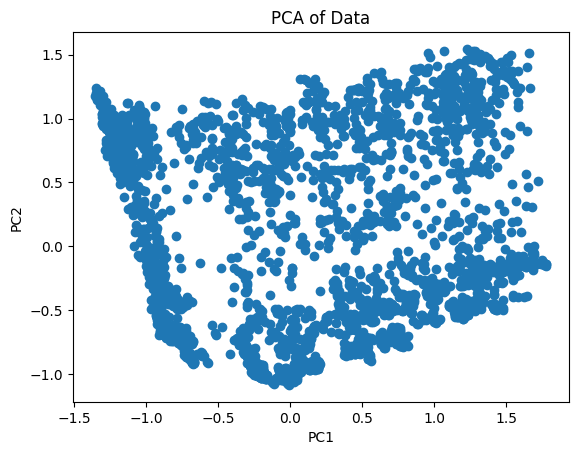

In [16]:
from sklearn.decomposition import PCA
import pandas as pd

# 加载数据
data = pd.read_csv('/home/develop/GATv2-VAE_NewData/data/csv/ceshi_temp_normalized.csv')



# PCA降维为2维
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)
# data_pca是一个二维数组，第一列是PC1，第二列是PC2
import matplotlib.pyplot as plt

plt.scatter(data_pca[:, 0], data_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Data')
plt.show()


In [14]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 加载数据
data = pd.read_csv('/home/develop/GATv2-VAE_NewData/data/csv/ceshi_temp_normalized.csv')

# 假设'yichang'列表示异常数据（值为1是异常）
yichang = data['yichang']  # 获取'yichang'列，用于标记异常数据
data = data.drop(columns=['yichang'])  # 删除'yichang'列

# PCA降维到2维
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# 创建一个散点图
plt.figure(figsize=(8, 6))

# 使用不同的颜色标记'yichang'值为1的数据
plt.scatter(data_pca[yichang == 0, 0], data_pca[yichang == 0, 1], color='blue', label='Normal Data')
plt.scatter(data_pca[yichang == 1, 0], data_pca[yichang == 1, 1], color='red', label='Anomaly Data')

# 添加标签和标题
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Data with Anomalies Highlighted')

# 添加图例
plt.legend()

# 显示图形
plt.show()


KeyError: 'yichang'